In [1]:
import matplotlib.pyplot as plt
import numpy as np
from protes import protes
from baselines import bs_control_gekko
from baselines import bs_nevergrad
from baselines import bs_optima_tt
from baselines import bs_ttopt
from build_knapsack import build_knapsack

In [6]:
K_list = [10, 25, 50, 100, 250]
k_list = [1, 2, 3, 4, 5, 6, 7]
r_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
d, f = build_knapsack()
res = {}
for K in K_list:
    res[K] = []
    for k in k_list:
        n_opt, y_opt = protes(f, d, 2, M=1.E+4, K=K, k=k)
        res[K].append(y_opt)
        print(f'K = {K:-3d} | k= {k:-3d} | {y_opt:-9.2e}')

K =  10 | k=   1 | -3.06e+03
K =  10 | k=   2 | -3.08e+03
K =  10 | k=   3 | -3.08e+03
K =  10 | k=   4 | -3.07e+03
K =  10 | k=   5 | -3.04e+03
K =  10 | k=   6 | -2.97e+03
K =  10 | k=   7 | -2.95e+03
K =  25 | k=   1 | -3.09e+03
K =  25 | k=   2 | -3.10e+03
K =  25 | k=   3 | -3.08e+03
K =  25 | k=   4 | -3.10e+03
K =  25 | k=   5 | -3.09e+03
K =  25 | k=   6 | -3.10e+03
K =  25 | k=   7 | -3.08e+03
K =  50 | k=   1 | -3.10e+03
K =  50 | k=   2 | -3.10e+03
K =  50 | k=   3 | -3.09e+03
K =  50 | k=   4 | -3.08e+03
K =  50 | k=   5 | -3.09e+03
K =  50 | k=   6 | -3.09e+03
K =  50 | k=   7 | -3.09e+03
K = 100 | k=   1 | -3.04e+03
K = 100 | k=   2 | -3.06e+03
K = 100 | k=   3 | -3.06e+03
K = 100 | k=   4 | -3.07e+03
K = 100 | k=   5 | -3.05e+03
K = 100 | k=   6 | -3.06e+03
K = 100 | k=   7 | -3.07e+03
K = 250 | k=   1 | -2.94e+03
K = 250 | k=   2 | -2.99e+03


2023-01-26 15:32:27.681480: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m34.245638s

********************************
[Compiling module jit_make_step] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-01-26 16:07:12.896449: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 34m39.333025s

********************************
[Compiling module jit_make_step] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


K = 250 | k=   3 | -2.94e+03
K = 250 | k=   4 | -3.00e+03
K = 250 | k=   5 | -3.02e+03
K = 250 | k=   6 | -2.94e+03
K = 250 | k=   7 | -3.01e+03


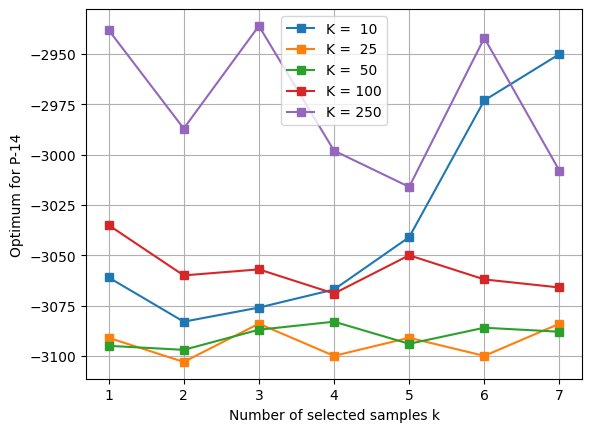

In [13]:
for K in K_list:
    plt.plot(k_list, res[K], label=f'K = {K:-3d}', marker='s')
plt.xlabel('Number of selected samples k')
plt.ylabel('Optimum for P-14')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
d, f = build_knapsack()
res2 = []
for r in r_list:
    n_opt, y_opt = protes(f, d, 2, M=1.E+4, r=r)
    res2.append(y_opt)
    print(f'r = {r:-3d} | {y_opt:-9.2e}')

In [2]:
M = int(1.E+4)
M_ng = M

d, f_pre = build_knapsack()

meths = ['OWN', 'BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6', 'BS7']
res_vals = {}
for meth in meths:
    res_vals[meth] = []

def f(i):
    y = f_pre(i)
    res_vals[meth].append(y)
    return y
    
f_batch = lambda I: np.array([f(i) for i in I])

# OWN: Find min value for the original tensor by the proposed method:
meth = 'OWN'
n_opt_own, y_opt_own = protes(f_batch, d, 2, M, batch=True, log=False)

# BS1: Find min value the original tensor by TTOpt:
meth = 'BS1'
n_opt_bs1, y_opt_bs1 = bs_ttopt(f_batch, [2]*d, M)
print(f'BS1 : {y_opt_bs1:-9.2e}')

# BS2: Find min value for TT-tensor by Optima-TT:
meth = 'BS2'
n_opt_bs2, y_opt_bs2 = bs_optima_tt(f_batch, [2]*d, M)
print(f'BS2 : {y_opt_bs2:-9.2e}')

# BS3 OnePlusOne method from nevergrad:
meth = 'BS3'
n_opt_bs3, y_opt_bs3 = bs_nevergrad(f, [2]*d, M_ng, 'OnePlusOne')
print(f'BS3 : {y_opt_bs3:-9.2e}')

# BS4 PSO method from nevergrad:
meth = 'BS4'
n_opt_bs4, y_opt_bs4 = bs_nevergrad(f, [2]*d, M_ng, 'PSO')
print(f'BS4 : {y_opt_bs4:-9.2e}')

# BS5 NoisyBandit method from nevergrad:
meth = 'BS5'
n_opt_bs5, y_opt_bs5 = bs_nevergrad(f, [2]*d, M_ng, 'NoisyBandit')
print(f'BS5 : {y_opt_bs5:-9.2e}')

# BS6 SPSA method from nevergrad:
meth = 'BS6'
n_opt_bs6, y_opt_bs6 = bs_nevergrad(f, [2]*d, M_ng, 'SPSA')
print(f'BS6 : {y_opt_bs6:-9.2e}')

# BS7 Portfolio method from nevergrad:
meth = 'BS7'
n_opt_bs7, y_opt_bs7 = bs_nevergrad(f, [2]*d, M_ng, 'Portfolio')
print(f'BS7 : {y_opt_bs7:-9.2e}')

# Present the result:
text = ''
text += f' kn | '
text += f'OWN {y_opt_own:-9.2e} | ' #
text += f'BS1 {y_opt_bs1:-9.2e} | ' # TTOpt
text += f'BS2 {y_opt_bs2:-9.2e} | ' # Optima-TT
text += f'BS3 {y_opt_bs3:-9.2e} | ' # nevergrad OnePlusOne
text += f'BS4 {y_opt_bs4:-9.2e} | ' # nevergrad PSO
text += f'BS5 {y_opt_bs5:-9.2e} | ' # nevergrad NoisyBandit
text += f'BS6 {y_opt_bs6:-9.2e} | ' # nevergrad SPSA
text += f'BS7 {y_opt_bs7:-9.2e} | ' # nevergrad Portfolio
print(text)

BS1 : -2.79e+03
BS2 : -2.14e+03
BS3 : -2.69e+03
BS4 : -3.04e+03
BS5 : -2.66e+03
BS6 : -2.55e+03
BS7 : -2.95e+03
 kn | OWN -3.09e+03 | BS1 -2.79e+03 | BS2 -2.14e+03 | BS3 -2.69e+03 | BS4 -3.04e+03 | BS5 -2.66e+03 | BS6 -2.55e+03 | BS7 -2.95e+03 | 


In [12]:
import matplotlib as mpl
import numpy as np
import pickle
from scipy.stats import kde


mpl.rcParams.update({
    'font.family': 'normal',
    'font.serif': [],
    'font.sans-serif': [],
    'font.monospace': [],
    'font.size': 12,
    'text.usetex': False,
})


import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'

In [64]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='upper left', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

In [65]:
res_inds = {}
res_opts = {}
for meth in meths:
    res_inds[meth] = []
    res_opts[meth] = []
    
for meth in meths:
    v_opt = None
    for k in range(len(res_vals[meth])):
        if res_vals[meth][k] < 0:
            if v_opt is None or res_vals[meth][k] < v_opt:
                v_opt = res_vals[meth][k]
                res_inds[meth].append(k+1)
                res_opts[meth].append(v_opt)

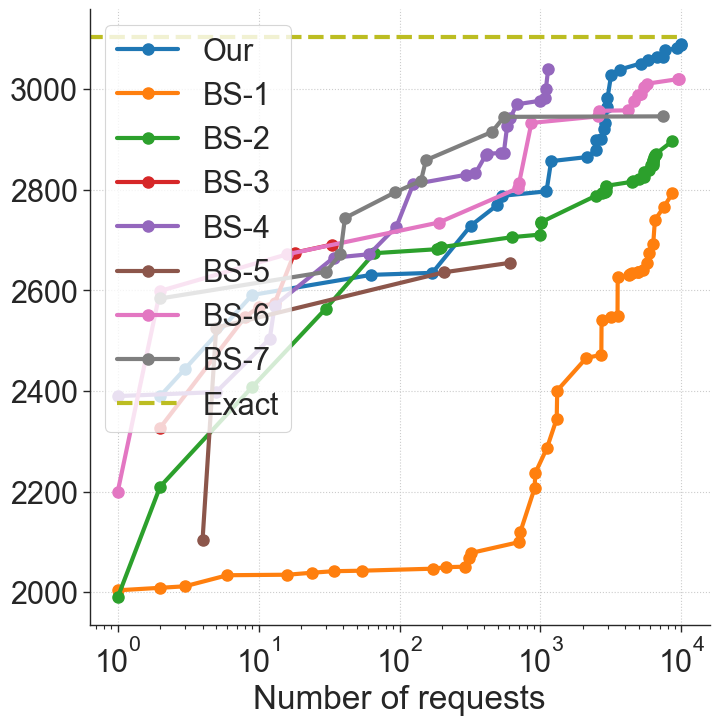

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.subplots_adjust(wspace=0.3)

ax.set_xlabel('Number of requests')
#ax.set_ylabel('Absolute error for maximum')

for meth in meths:
    label = meth if meth != 'OWN' else 'Our'
    label = label.replace('BS', 'BS-')
    ax.plot(res_inds[meth], -np.array(res_opts[meth]), label=label,
        marker='o', markersize=8, linewidth=3)

ax.plot(np.linspace(0, 10000, 100), [3103]*100, '--', label='Exact',
    marker='o', markersize=0, linewidth=3)
    

prep_ax(ax, xlog=True, ylog=False, leg=True)
#ax.set_ylim(1.8E+3, 3.2E+3)
#yticks = [1.8E+3, 2.0E+3, 2.2E+3, 2.4E+3, 2.6E+3, 2.8E+3, 3.0E+3, 3.2E+3]
#ax.set(yticks=yticks, yticklabels=[int(])
#ax.get_yaxis().get_major_formatter().labelOnlyBase = False
plt.savefig('dep.png', bbox_inches='tight')